<a href="https://colab.research.google.com/github/codeanster/gonzalos_playground/blob/master/Astronomy/Green_Valley_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [52]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Green_valley_images/dataset/training_set',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Green_valley_images/dataset/test_set',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 363 images belonging to 4 classes.
Found 68 images belonging to 4 classes.


In [53]:
learning_rate = 0.00001

In [54]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[256, 256, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
cnn.optimizer.lr = learning_rate
r = cnn.fit(x = training_set,validation_data = test_set, epochs = 25)

Epoch 1/25
12/12 [==============================] - 10s 815ms/step - loss: 1.0292 - accuracy: 0.7332 - val_loss: 1.2591 - val_accuracy: 0.5294
Epoch 2/25
12/12 [==============================] - 9s 740ms/step - loss: 0.8858 - accuracy: 0.7366 - val_loss: 1.3093 - val_accuracy: 0.5294
Epoch 3/25
12/12 [==============================] - 9s 732ms/step - loss: 0.8556 - accuracy: 0.7405 - val_loss: 1.2191 - val_accuracy: 0.5294
Epoch 4/25
12/12 [==============================] - 9s 733ms/step - loss: 0.8778 - accuracy: 0.7208 - val_loss: 1.1833 - val_accuracy: 0.5294
Epoch 5/25
12/12 [==============================] - 9s 740ms/step - loss: 0.8575 - accuracy: 0.7315 - val_loss: 1.2287 - val_accuracy: 0.5294
Epoch 6/25
12/12 [==============================] - 9s 738ms/step - loss: 0.9017 - accuracy: 0.6968 - val_loss: 1.2307 - val_accuracy: 0.5294
Epoch 7/25
12/12 [==============================] - 9s 736ms/step - loss: 0.9099 - accuracy: 0.7068 - val_loss: 1.2385 - val_accuracy: 0.5294
Epoch

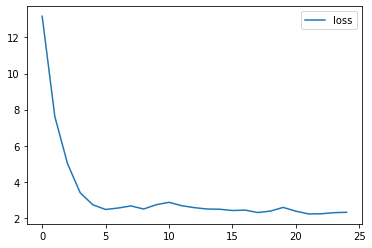

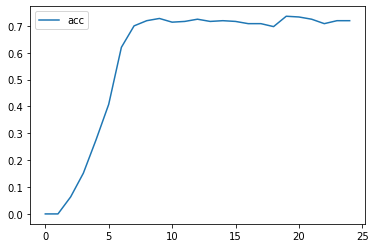

In [33]:
plt.plot(r.history['loss'], label='loss')
plt.legend()